# Task 1: Titanic Survival Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Titanic-Dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Clean the data set

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.drop(columns=['Cabin'],inplace=True)

In [10]:
df['Age'].replace(np.nan,df['Age'].mean(),inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8928\832010488.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace(np.nan,df['Age'].mean(),inplace=True)


In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
df.dropna(subset=['Embarked'], inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [15]:
df.duplicated().sum()

0

In [16]:
print("\nUnique values in 'Sex':\n", df['Sex'].unique())
print("\nUnique values in 'Embarked':\n", df['Embarked'].unique())
print("\nUnique values in 'Pclass':\n", df['Pclass'].unique())
print("\nUnique values in 'Survived':\n", df['Survived'].unique())


Unique values in 'Sex':
 ['male' 'female']

Unique values in 'Embarked':
 ['S' 'C' 'Q']

Unique values in 'Pclass':
 [3 1 2]

Unique values in 'Survived':
 [0 1]


After Cleaning

In [17]:
df.shape

(889, 11)

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [20]:
backup = df.copy()

Check The survival Count

In [21]:
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [22]:
df['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [23]:
df[['Sex','Survived']]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


<Axes: xlabel='Survived', ylabel='count'>

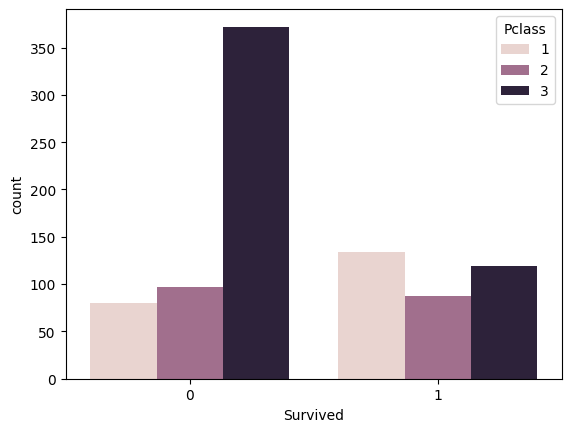

In [24]:
sns.countplot(x=df['Survived'], hue=df['Pclass'])

in the above visualization we can see that 3 class are less survived

<Axes: xlabel='Sex', ylabel='count'>

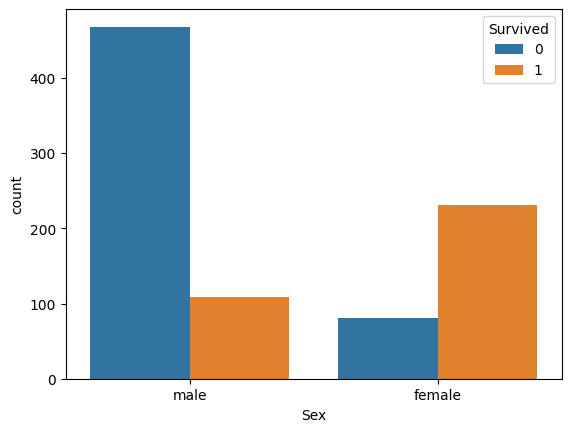

In [25]:
sns.countplot(x=df['Sex'], hue=df['Survived'])

in the above we can see that male are less survived

In [26]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

<Axes: xlabel='Sex', ylabel='count'>

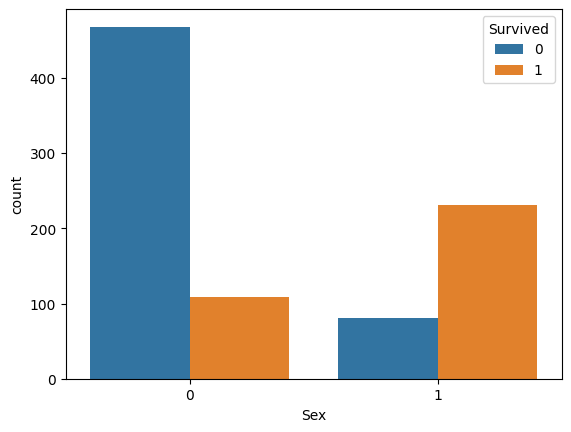

In [27]:
sns.countplot(x=df['Sex'], hue=df['Survived'])

In [28]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [29]:
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


In [32]:
df[df['Survived'] == 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
8,1,3,1,27.0,0,2,11.1333,False,True
9,1,2,1,14.0,1,0,30.0708,False,False
...,...,...,...,...,...,...,...,...,...
875,1,3,1,15.0,0,0,7.2250,False,False
879,1,1,1,56.0,0,1,83.1583,False,False
880,1,2,1,25.0,0,1,26.0000,False,True
887,1,1,1,19.0,0,0,30.0000,False,True


Train and test Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (711, 8)
Shape of y_train: (711,)
Shape of X_test: (178, 8)
Shape of y_test: (178,)


In [121]:
# print(f"Shape of X_train: {x_train.shape}")
# print(f"Shape of y_train: {y_train.shape}")

Model

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7584269662921348
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       109
           1       0.67      0.74      0.70        69

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.76      0.76      0.76       178

Confusion Matrix:
[[84 25]
 [18 51]]


In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


In [39]:
new_passenger = {
    'Pclass': 3,
    'Sex': 0,  # 0 for male, 1 for female
    'Age': 25.0,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked_Q': 0,
    'Embarked_S': 1,
}

In [40]:
new_passenger_df = pd.DataFrame([new_passenger])

In [41]:
prediction = model.predict(new_passenger_df)

In [42]:
survived = prediction[0]
if survived == 1:
    print("The passenger survived.")
else:
    print("The passenger did not survive.")

The passenger did not survive.


In [48]:
new_passenger = {
    'Pclass': 1,
    'Sex': 1,  
    'Age': 25.0,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked_Q': 0,
    'Embarked_S': 1,
}

In [49]:
new_passenger_df = pd.DataFrame([new_passenger])

In [50]:
prediction = model.predict(new_passenger_df)

In [51]:
survived = prediction[0]
print(survived)
if survived == 1:
    print("The passenger survived.")
else:
    print("The passenger did not survive.")

1
The passenger survived.
